# CARGO DATOS

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


TARGGET =  Life expectancy 

In [39]:
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [40]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [41]:
if columns_to_drop := [column for column in total_data.columns if '%' in column or 'Percent' in column or 'rate' in column or column.startswith('PCT')]:
    total_data.drop(columns=columns_to_drop, inplace=True)
    print("Columnas eliminadas:", columns_to_drop)
else:
    print("No columns matched the criteria for removal.")
print(total_data.shape)
total_data.head()

Columnas eliminadas: ['0-9 y/o % of total pop', '10-19 y/o % of total pop', '20-29 y/o % of total pop', '30-39 y/o % of total pop', '40-49 y/o % of total pop', '50-59 y/o % of total pop', '60-69 y/o % of total pop', '70-79 y/o % of total pop', '80+ y/o % of total pop', '% White-alone', '% Black-alone', '% NA/AI-alone', '% Asian-alone', '% Hawaiian/PI-alone', '% Two or more races', 'Percent of adults with less than a high school diploma 2014-18', 'Percent of adults with a high school diploma only 2014-18', "Percent of adults completing some college or associate's degree 2014-18", "Percent of adults with a bachelor's degree or higher 2014-18", 'PCTPOVALL_2018', 'PCTPOV017_2018', 'PCTPOV517_2018', 'Unemployment_rate_2018', 'Med_HH_Income_Percent_of_State_Total_2018', 'Percent of Population Aged 60+', 'anycondition_Lower 95% CI', 'anycondition_Upper 95% CI', 'Obesity_Lower 95% CI', 'Obesity_Upper 95% CI', 'Heart disease_Lower 95% CI', 'Heart disease_Upper 95% CI', 'COPD_Lower 95% CI', 'COP

,fips,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,...,Obesity_number,Heart disease_prevalence,Heart disease_number,COPD_prevalence,COPD_number,diabetes_prevalence,diabetes_number,CKD_prevalence,CKD_number,Urban_rural_code
0,1001,55601,6787,7637,6878,7089,7582,7738,5826,4050,...,15193,7.9,3345,8.6,3644,12.9,5462,3.1,1326,3
1,1003,218022,24757,26913,23579,25213,27338,29986,29932,20936,...,50761,7.8,13414,8.6,14692,12.0,20520,3.2,5479,4
2,1005,24881,2732,2960,3268,3201,3074,3278,3076,2244,...,8013,11.0,2159,12.1,2373,19.7,3870,4.5,887,6
3,1007,22400,2456,2596,3029,3113,3038,3115,2545,1723,...,6894,8.6,1533,10.0,1789,14.1,2511,3.3,595,2
4,1009,57840,7095,7570,6742,6884,7474,7844,6965,4931,...,15112,9.2,4101,10.5,4661,13.5,6017,3.4,1507,2


# ANALISIS DE VARIABLES CATEGORICAS 

In [42]:
def nombres_columnas_categoricas(total_data):
    print("Columnas categóricas:")
    for columna in total_data.columns:
        if total_data[columna].dtype == 'object' or total_data[columna].dtype.name == 'category':
            print(columna)

# Llamar a la función con tu DataFrame
nombres_columnas_categoricas(total_data)

Columnas categóricas:
COUNTY_NAME
STATE_NAME


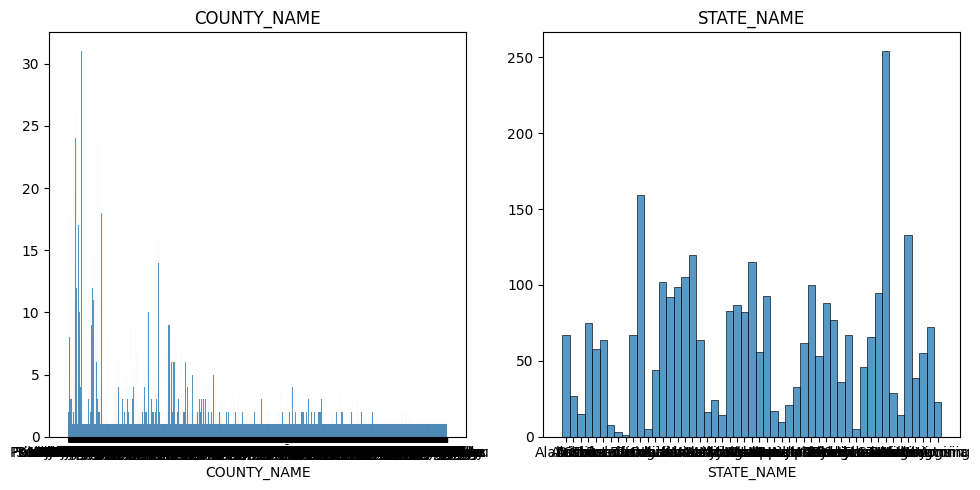

In [43]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
def nombres_columnas_categoricas(df):
    return [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']
columnas_categoricas_modelo = nombres_columnas_categoricas(df)
columnas_categoricas = [col for col in columnas_categoricas_modelo if col in df.columns]
if not columnas_categoricas:
    print("No se encontraron columnas categóricas en el DataFrame.")
else:
    fig, axis = plt.subplots(1, len(columnas_categoricas), figsize=(5 * len(columnas_categoricas), 5))
    if len(columnas_categoricas) == 1:
        axis = [axis]

    for i, col in enumerate(columnas_categoricas):
        sns.histplot(ax=axis[i], data=df, x=col).set(ylabel=None)
        axis[i].set_title(col)
    plt.tight_layout()
    plt.show()

### conclusiones: 
- Gráfico de county_name: Este gráfico muestra la distribución de los nombres de los condados. Es probable que algunos condados aparezcan con mayor frecuencia, lo que podría indicar que los datos están concentrados en ciertas áreas geográficas. 
- Gráfico de state_name: Este gráfico representa la frecuencia de los nombres de los estados. Si un estado tiene una barra significativamente más alta, indica que los datos están dominados por ese estado en particular. Esto podría ser relevante si el análisis busca una representación equitativa entre estados.

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
# ahora voy a eliminar datos duplicados que me desvirtúan el análisis para el modelo
if df.duplicated().any():
    df = df.drop_duplicates()
    print("duplicates are removed")
else:
    print("there are no duplicates anymore in my dataset, yuhuuuu")

there are no duplicates anymore in my dataset, yuhuuuu


# ANÁLISIS DE VARIABLES NUMÉRICAS

In [46]:
# Identificar las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number']).columns.tolist()

# Imprimir las columnas numéricas
print("Las columnas numéricas en el dataset son:")
for i, columna in enumerate(columnas_numericas, start=1):
    print(f"{i}. {columna}")

Las columnas numéricas en el dataset son:
1. fips
2. TOT_POP
3. 0-9
4. 0-9 y/o % of total pop
5. 19-Oct
6. 10-19 y/o % of total pop
7. 20-29
8. 20-29 y/o % of total pop
9. 30-39
10. 30-39 y/o % of total pop
11. 40-49
12. 40-49 y/o % of total pop
13. 50-59
14. 50-59 y/o % of total pop
15. 60-69
16. 60-69 y/o % of total pop
17. 70-79
18. 70-79 y/o % of total pop
19. 80+
20. 80+ y/o % of total pop
21. White-alone pop
22. % White-alone
23. Black-alone pop
24. % Black-alone
25. Native American/American Indian-alone pop
26. % NA/AI-alone
27. Asian-alone pop
28. % Asian-alone
29. Hawaiian/Pacific Islander-alone pop
30. % Hawaiian/PI-alone
31. Two or more races pop
32. % Two or more races
33. POP_ESTIMATE_2018
34. N_POP_CHG_2018
35. GQ_ESTIMATES_2018
36. R_birth_2018
37. R_death_2018
38. R_NATURAL_INC_2018
39. R_INTERNATIONAL_MIG_2018
40. R_DOMESTIC_MIG_2018
41. R_NET_MIG_2018
42. Less than a high school diploma 2014-18
43. High school diploma only 2014-18
44. Some college or associate's degre

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
columnas_numericas = [col for col in df.select_dtypes(include=['number']).columns if df[col].notna().sum() > 0]
num_columnas = len(columnas_numericas)
filas = (num_columnas // 5) + (1 if num_columnas % 5 != 0 else 0)
fig, axis = plt.subplots(filas, 5, figsize=(15, 4 * filas)) 
axis = axis.flatten() 
for i, col in enumerate(columnas_numericas):
    sns.histplot(data=df, x=col, ax=axis[i], color='lightgreen', kde=True).set(ylabel=None)  
    axis[i].set_title(f"Distribución de {col}")
for j in range(len(columnas_numericas), len(axis)):
    axis[j].set_visible(False)
plt.tight_layout()
plt.show()
fig, axis = plt.subplots(filas, 5, figsize=(15, 4 * filas))  
axis = axis.flatten() 
for i, col in enumerate(columnas_numericas):
    sns.boxplot(data=df, x=col, ax=axis[i]).set(ylabel=None)
    axis[i].set_title(f"Boxplot de {col}")
for j in range(len(columnas_numericas), len(axis)):
    axis[j].set_visible(False)
plt.tight_layout()
plt.show()

# ANALISIS DE VARIABLES MULTIVARIANTE

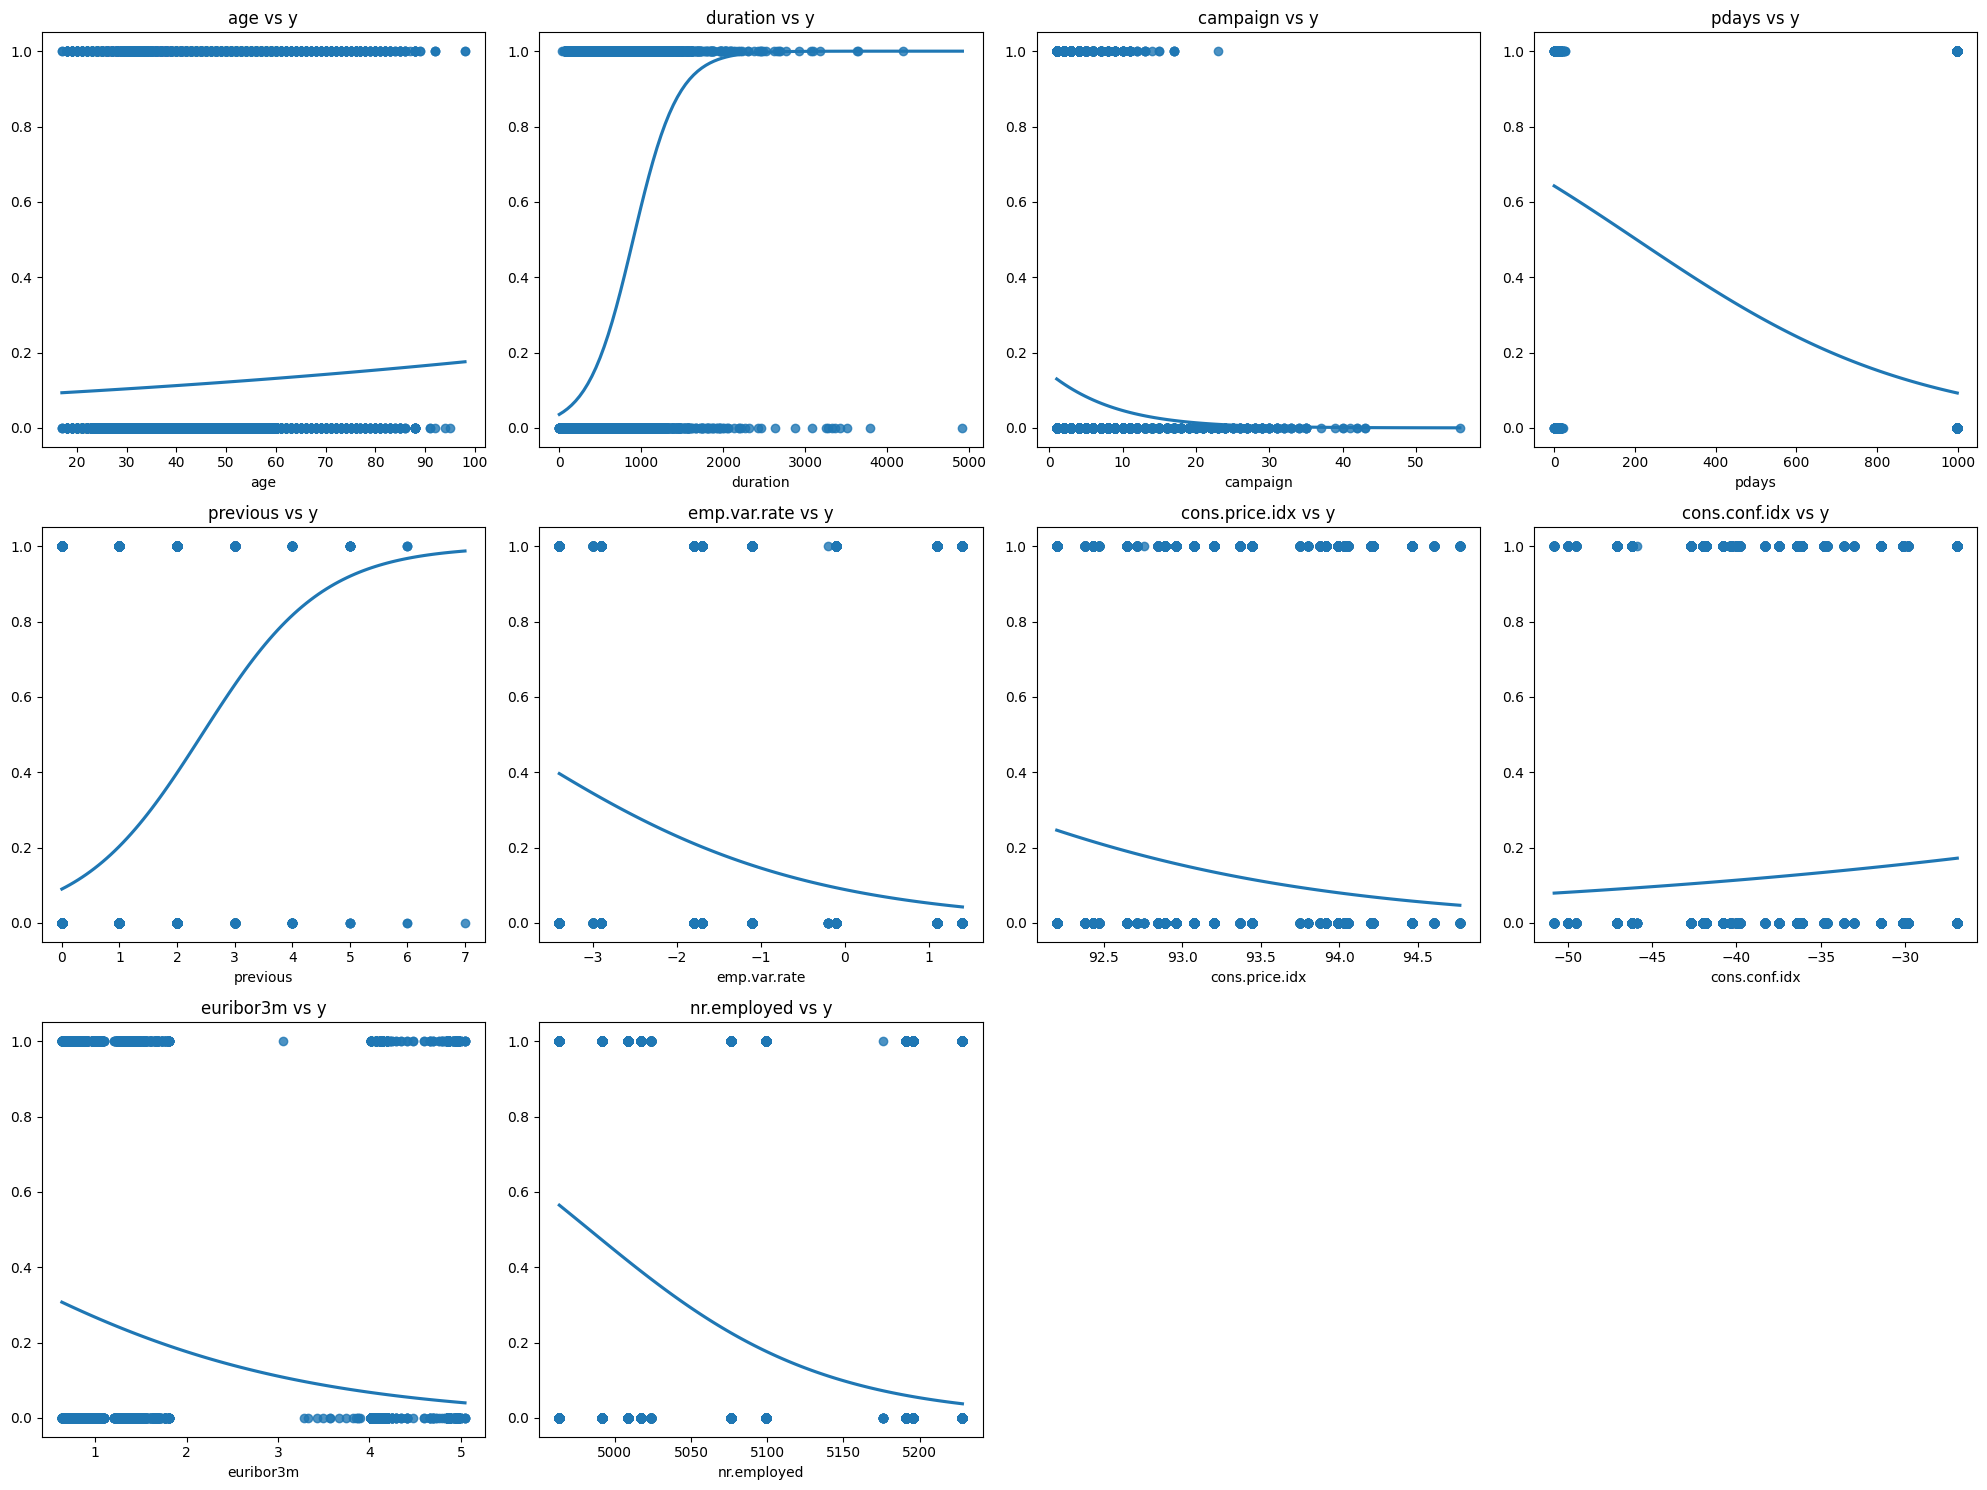

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

# Identify numerical columns and the target variable
columnas_numericas = [col for col in df.select_dtypes(include=['number']).columns if df[col].notna().sum() > 0]
target = 'y'

# Convert the target variable to numeric values
df[target] = df[target].apply(lambda x: 1 if x == 'yes' else 0)

# Create subplots dynamically based on the number of numerical variables
num_plots = len(columnas_numericas)
filas = (num_plots + 3) // 4
fig, axis = plt.subplots(filas, 4, figsize=(20, filas * 5))

# Flatten the axis array for easier access
axis = axis.flatten()

# Create a scatter plot for each numerical variable with the target variable `y`
for i, col in enumerate(columnas_numericas):
    sns.regplot(ax=axis[i], data=df, x=col, y=target, logistic=True, ci=None).set(ylabel=None)
    axis[i].set_title(f'{col} vs {target}')

# Remove empty axes
for j in range(len(columnas_numericas), len(axis)):
    fig.delaxes(axis[j])

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

CONCLUSIONES : age vs y: La probabilidad de aceptación varía según la edad, siendo mayor en ciertos grupos como personas mayores.
duration vs y: Cuanto más larga sea la llamada, mayor es la probabilidad de que el cliente acepte la oferta.
campaign vs y: Un número muy alto de contactos durante la campaña podría reducir la probabilidad de aceptación debido a la saturación del cliente.
pdays vs y: Clientes contactados recientemente tienen una mayor probabilidad de aceptar la oferta.
previous vs y: Un mayor número de contactos previos está asociado con una mayor probabilidad de aceptación.
emp.var.rate vs y: Una menor variación en la tasa de empleo está relacionada con una mayor probabilidad de aceptación.
cons.price.idx vs y: El índice de precios al consumidor no muestra una relación clara con la probabilidad de aceptación.
cons.conf.idx vs y: Una menor confianza del consumidor parece estar asociada con una mayor probabilidad de aceptación.
euribor3m vs y: Tasas Euribor más bajas están relacionadas con una mayor probabilidad de aceptación.
nr.employed vs y: Un menor número de empleados está asociado con una mayor probabilidad de aceptación.

VARIABLES CATEGORICO - CATEGORICO

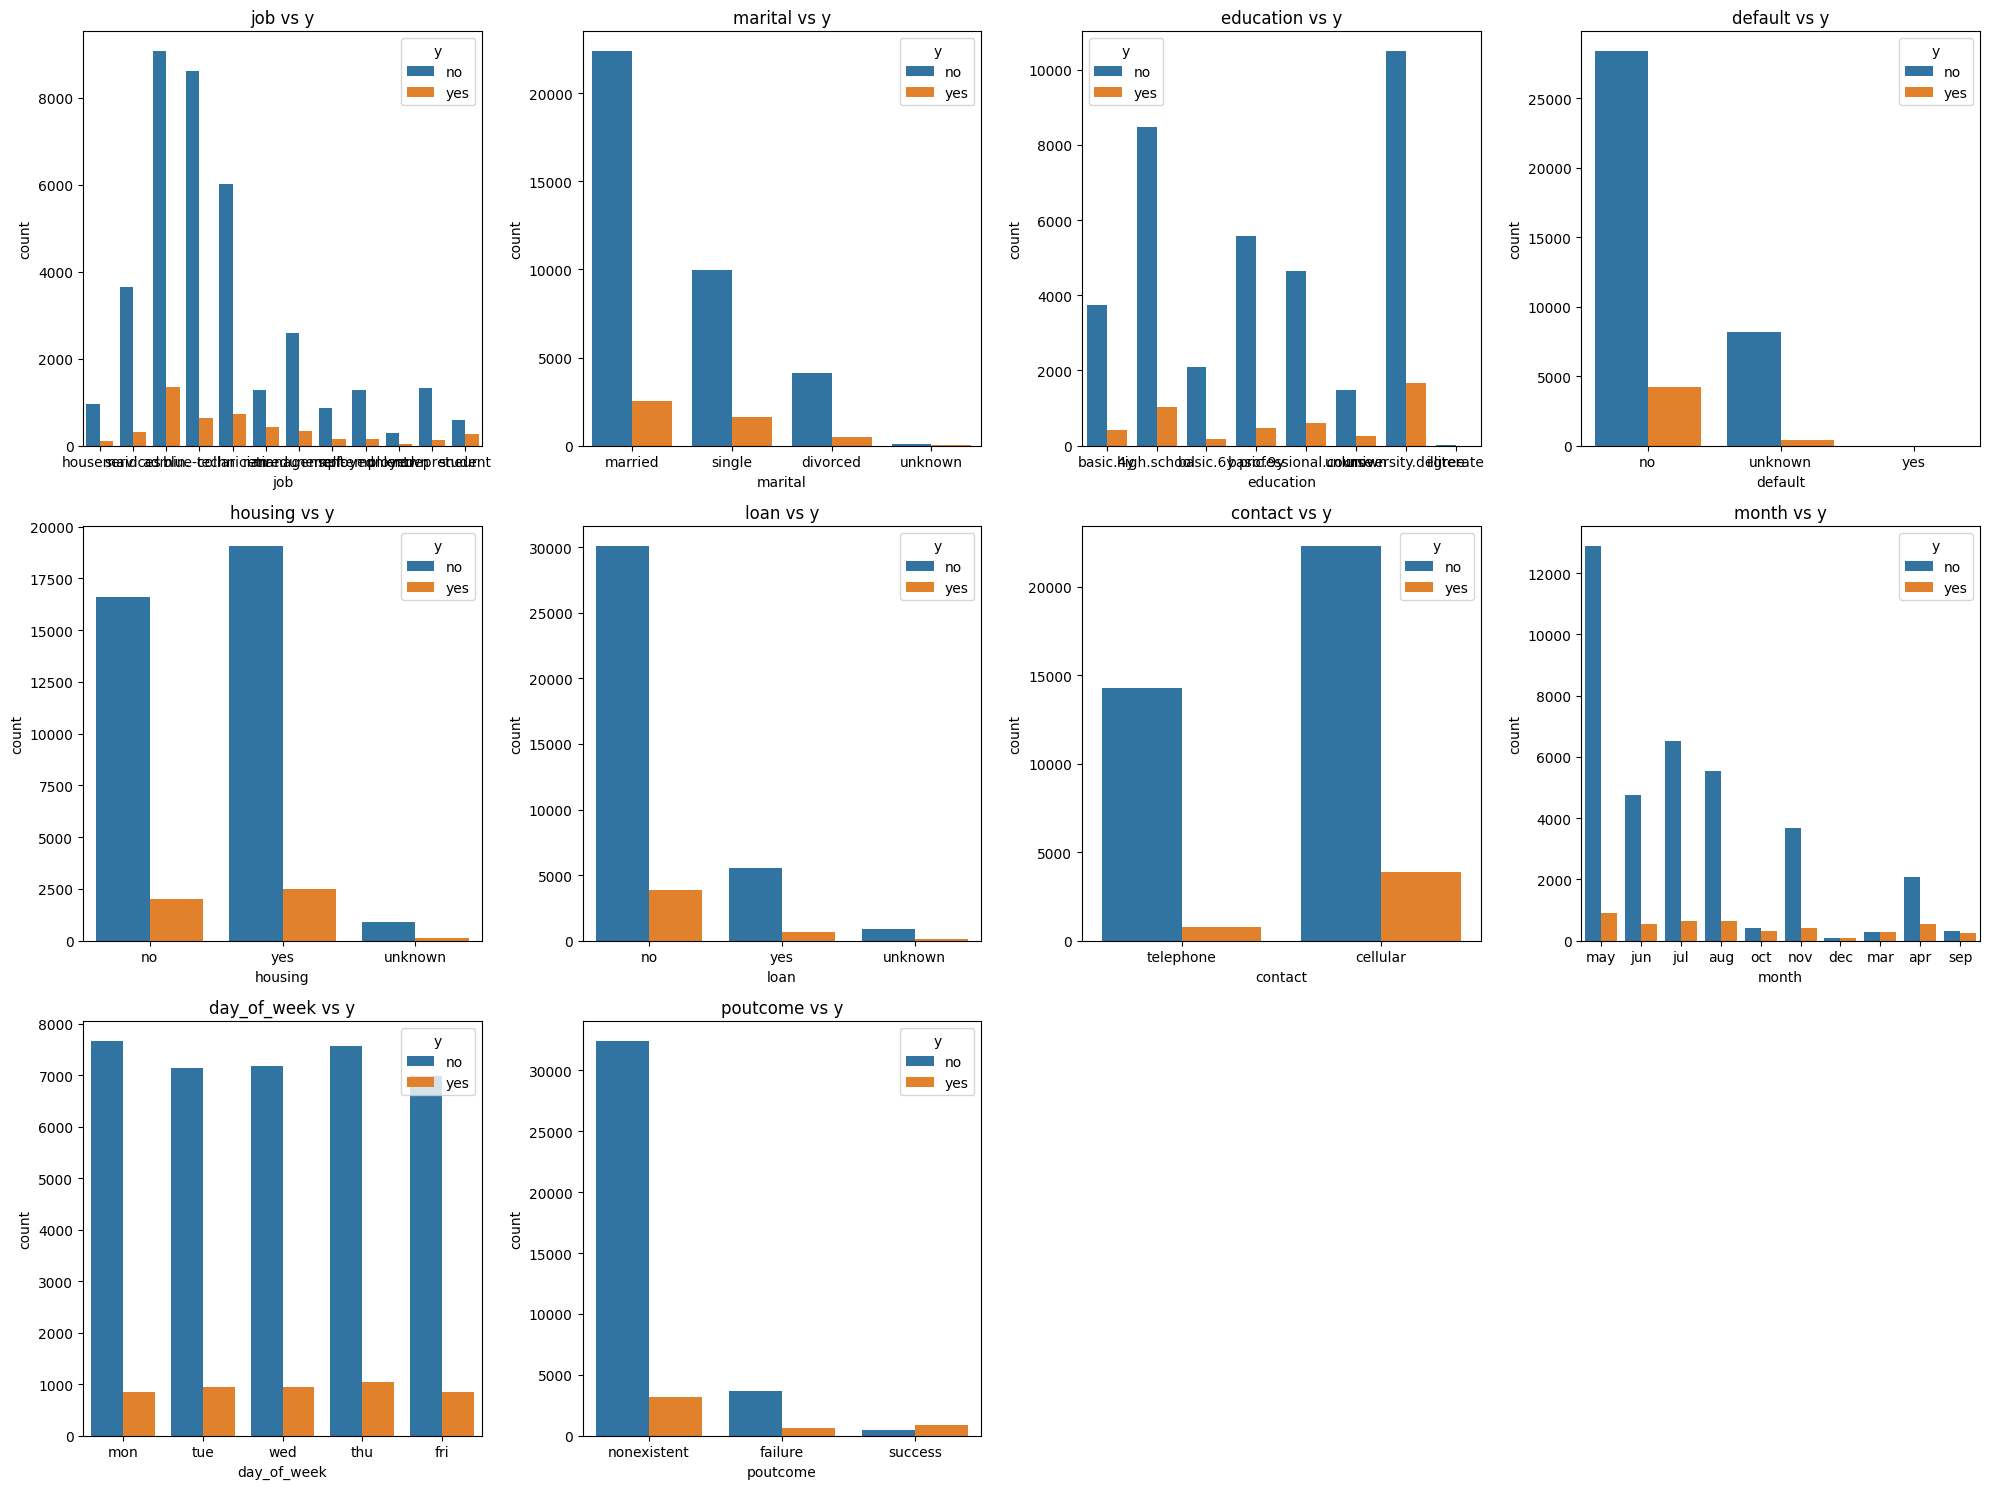

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Cargar los datos
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep = ";")
# Identificar las columnas categóricas
columnas_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
# Crear subplots dinámicamente basado en el número de variables categóricas
num_plots = len(columnas_categoricas)
fig, axis = plt.subplots((num_plots + 3) // 4, 4, figsize=(20, (num_plots + 3) // 4 * 5))
# Aplanar la matriz de ejes para un acceso más fácil
axis = axis.flatten()
# Crear un gráfico de conteo para cada variable categórica con la variable objetivo `y`
for i, col in enumerate(columnas_categoricas):
    sns.countplot(data=df, x=col, hue="y", ax=axis[i])
    axis[i].set_title(f'{col} vs y')
# Eliminar los ejes vacíos
for j in range(len(columnas_categoricas), len(axis)):
    fig.delaxes(axis[j])
# Ajustar el layout
plt.tight_layout()
# Mostrar el plot
plt.show()

job: Trabajos como "student" y "retired" tienen mayor aceptación (y=1), mientras que "blue-collar" tiene menor aceptación.
marital: Los solteros (single) aceptan más que los casados (married) o divorciados (divorced).
education: Niveles educativos altos (como "university degree") tienen mayor aceptación.
default: Clientes sin historial de incumplimiento (default=no) aceptan más.
housing: Clientes sin hipoteca (housing=no) tienen mayor aceptación.
loan: Clientes sin préstamos personales (loan=no) aceptan más.
contact: Contactos por móvil (contact=cellular) tienen mayor aceptación.
month: Meses como marzo (mar) y diciembre (dec) tienen mayor aceptación.
day_of_week: El día de la semana no tiene un impacto significativo.
poutcome: Resultados previos exitosos (poutcome=success) están fuertemente asociados con mayor aceptación.
Resumen:

ANÁLISIS NUMÉRICO - CATEGÓRICO

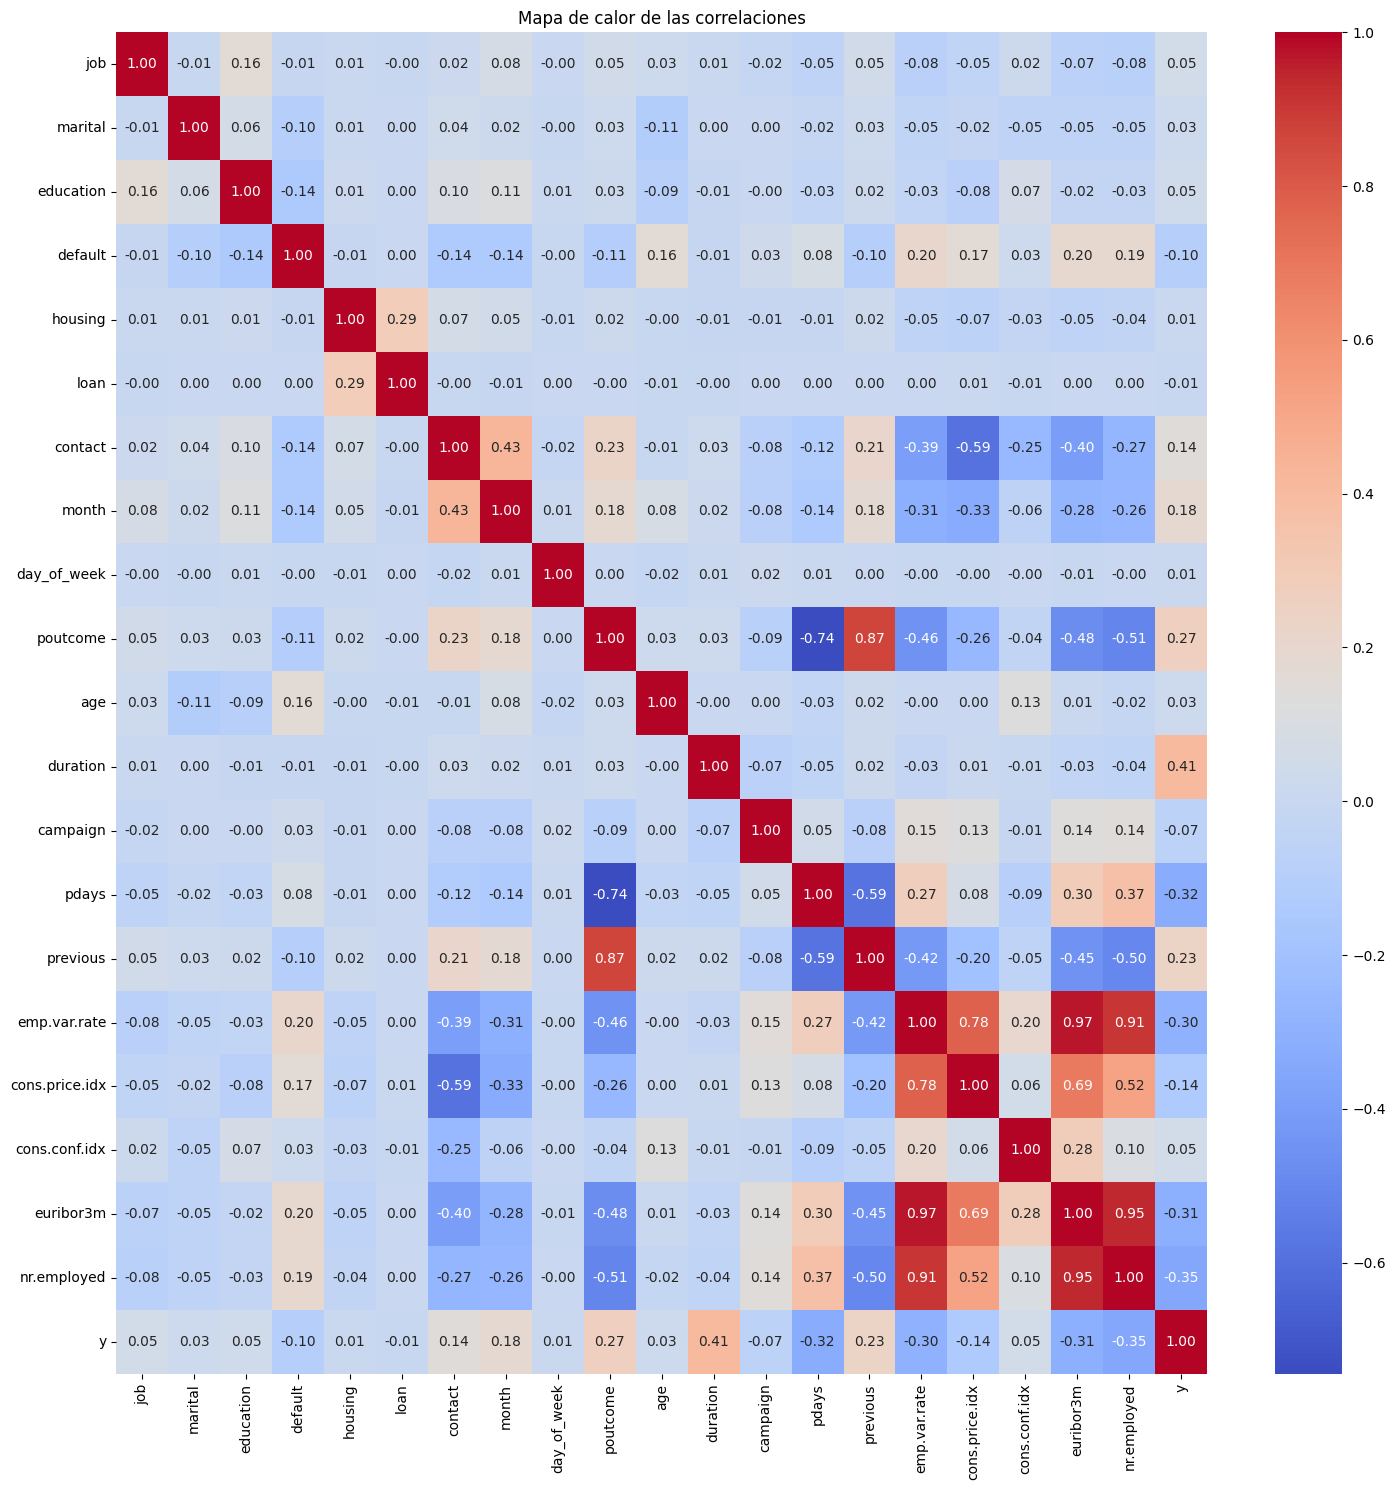

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos
DATOS = '/workspaces/13-PILAR-MACHINELEARNING/DATOS.csv'

# Identificar las columnas categóricas, numéricas y la variable objetivo
columnas_categoricas = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
columnas_numericas = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
target = 'y'

# Convertir la variable objetivo a valores numéricos
df[target] = df[target].apply(lambda x: 1 if x == 'yes' else 0)

# Factorizar las variables categóricas
for col in columnas_categoricas:
    df[col] = pd.factorize(df[col])[0]

# Crear el heatmap con las variables categóricas, numéricas y la variable objetivo
fig, axes = plt.subplots(figsize=(15, 15))
sns.heatmap(df[columnas_categoricas + columnas_numericas + [target]].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de calor de las correlaciones")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
#COUNTY_NAME', 'STATE_NAME'

categorical_to_numerical = [   {'categorical_col': 'COUNTY_NAME'},
    {'categorical_col': 'STATE_NAME'} ]

In [ ]:
import os
import json

# Crear el directorio si no existe
ruta_directorio = "../data/processed/Json/"     
if not os.path.exists(ruta_directorio):
    os.makedirs(ruta_directorio)

# Guardar el archivo JSON
outliers_dict = {}  # Asegúrate de que outliers_dict esté definido
with open(os.path.join(ruta_directorio, "outliers_dict.json"), "w") as f:
    json.dump(outliers_dict, f)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

def plot_numerico_numerico_adjust(total_data, variables_numericas, target='anycondition_prevalence'):
    """
    Genera regplots y heatmaps optimizados para variables numéricas contra un target, utilizando subplots_adjust.
    """
    if target not in total_data.columns:
        raise KeyError(f"La columna '{target}' no existe en el DataFrame.")
    num_variables = len(variables_numericas)
    num_filas = (num_variables + 1) // 2
    fig, axes = plt.subplots(num_filas, 4, figsize=(24, 8 * num_filas))
    for i, col in enumerate(variables_numericas):
        fila = i // 2
        columna = (i % 2) * 2
        sns.regplot(ax=axes[fila, columna], data=total_data, x=col, y=target)
        axes[fila, columna].set_title(f'Regplot de {col} vs {target}')
        sns.heatmap(total_data[[col, target]].corr(), annot=True, fmt=".2f", ax=axes[fila, columna + 1], cbar=True)
        axes[fila, columna + 1].set_title(f'Heatmap de correlación de {col} vs {target}')
    if num_variables % 2 != 0:
        axes[-1, -2].remove()
        axes[-1, -1].remove()
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    plt.show()

numericals_variables = total_data.select_dtypes(include=['number']).columns.tolist()
if 'anycondition_prevalence' in numericals_variables:
    total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
    numericals_variables.remove('anycondition_prevalence')
plot_numerico_numerico_adjust(total_data, numericals_variables)

In [ ]:
if categorical_to_numerical:
    for conversion in categorical_to_numerical:
        categorical_col = conversion['categorical_col']
        numerical_col = conversion.get('numerical_col', f"{categorical_col}_n")
        
        # Verificar si la columna categórica existe en el DataFrame
        if categorical_col in total_data.columns:
            total_data[numerical_col] = pd.factorize(total_data[categorical_col])[0]

            transformation_rules = {row[categorical_col]: row[numerical_col] for _, row in total_data[[categorical_col, numerical_col]].drop_duplicates().iterrows()}
            ruta_directorio = "../data/processed/Json/"
            
            # Crear el directorio si no existe
            if not os.path.exists(ruta_directorio):
                os.makedirs(ruta_directorio)
            
            # Definir la ruta completa del archivo
            ruta_archivo = os.path.join(ruta_directorio, f"{numerical_col}_transformation_rules.json")
            
            # Guardar el JSON en la ruta especificada
            with open(ruta_archivo, "w") as f:
                json.dump(transformation_rules, f)
                print(f"Archivo guardado en: {ruta_archivo}")

    # Seleccionar solo las columnas numéricas (DESPUÉS de la conversión)
    numerical_total_data = total_data.select_dtypes(include='number')
    plt.figure(figsize=(20, 20))
    
    # Calcular la correlación y crear el heatmap solo para las columnas numéricas
    sns.heatmap(numerical_total_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Matriz de correlación')
    plt.show()

NameError: name 'categorical_to_numerical' is not defined

CONCLUSIONES de la correlacion: duration y y: Existe una fuerte correlación positiva entre la duración de la llamada y la aceptación de la oferta (y). Es la variable más relevante para predecir el éxito.

euribor3m y y: Correlación negativa moderada. Tasas más bajas están asociadas con una mayor probabilidad de aceptación.

emp.var.rate y y: Correlación negativa moderada. Una menor variación en la tasa de empleo está relacionada con una mayor aceptación.

Otras variables numéricas: Variables como age, campaign, y pdays tienen correlaciones débiles con y, lo que indica que su impacto es menor.

Variables categóricas: Las variables categóricas factorizadas tienen correlaciones bajas con y, pero podrían ser útiles en combinación con otras variables en un modelo.

Resumen:
La variable más importante es duration, seguida de euribor3m y emp.var.rate. Las demás variables tienen menor impacto directo en la aceptación (y).

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Cargar los datos
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

# Identificar las columnas categóricas
columnas_categoricas = [col for col in df.columns if df[col].dtype == 'object' or df[col].dtype.name == 'category']

# Verificar si hay columnas categóricas
if not columnas_categoricas:
    print("No se encontraron columnas categóricas en el DataFrame.")
else:
    # Crear subplots dinámicamente basado en el número de variables categóricas
    num_plots = len(columnas_categoricas)
    filas = (num_plots + 3) // 4  # Calcular el número de filas necesarias (máximo 4 gráficos por fila)
    fig, axis = plt.subplots(filas, 4, figsize=(20, filas * 5))  # Ajustar el tamaño según el número de filas

    # Aplanar la matriz de ejes para un acceso más fácil
    axis = axis.flatten()

    # Crear un gráfico de conteo para cada variable categórica
    for i, col in enumerate(columnas_categoricas):
        sns.countplot(data=df, x=col, ax=axis[i])
        axis[i].set_title(f'Distribución de {col}')
        axis[i].tick_params(axis='x', rotation=45)  # Rotar etiquetas para mejor visualización si es necesario

    # Eliminar los ejes vacíos
    for j in range(len(columnas_categoricas), len(axis)):
        fig.delaxes(axis[j])

    # Ajustar el layout
    plt.tight_layout()

    # Mostrar el plot
    plt.show()

In [ ]:
#COUNTY_NAME', 'STATE_NAME'

categorical_to_numerical = [   {'categorical_col': 'COUNTY_NAME'},
    {'categorical_col': 'STATE_NAME'} ]

# INGENIERIA DE FUNCIONES

In [ ]:
import pandas as pd
import json 
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")
total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers(column, df):
    colum_stats = df[column].describe()
    IQR = colum_stats["75%"] - colum_stats["25%"]
    lower_bound = colum_stats["25%"] - 1.5 * IQR
    upper_bound = colum_stats["75%"] + 1.5 * IQR
    if lower_bound < 0: lower_bound = min(df[column])
    #remove upper outliers
    df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)
    #remove lower outliers
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)
    return df.copy(), [lower_bound, upper_bound]

outliers_dict = {}

column_filter_numericas_con_outliers = total_data.select_dtypes(include = 'number').drop(columns = ['anycondition_prevalence', 'STATE_FIPS', 'Urban_rural_code', 'COUNTY_NAME_n', 'STATE_NAME_n'], errors='ignore').columns # Si quiero eliminar alguna columna rellenar la parte de drop.

for column in column_filter_numericas_con_outliers: # RECORDAR CAMBIAR LAS COLUMNAS. 
  total_data_sin_outliers, limits_list = replace_outliers(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("../data/processed/Json/outliers_dict.json", "w") as f:
    json.dump(outliers_dict, f)

outliers_dict

{'fips': [1001, np.float64(85433.0)],
 'TOT_POP': [88, np.float64(153337.625)],
 '0-9': [0, np.float64(18321.75)],
 '0-9 y/o % of total pop': [np.float64(7.0588377662499955),
  np.float64(16.487640596250003)],
 '19-Oct': [0, np.float64(19993.875)],
 '10-19 y/o % of total pop': [np.float64(8.697336139999999),
  np.float64(16.63644994)],
 '20-29': [0, np.float64(20545.0)],
 '20-29 y/o % of total pop': [np.float64(6.468544207500002),
  np.float64(17.2104902675)],
 '30-39': [11, np.float64(18936.5)],
 '30-39 y/o % of total pop': [np.float64(7.7642376849999994),
  np.float64(15.564463085000002)],
 '40-49': [4, np.float64(18433.375)],
 '40-49 y/o % of total pop': [np.float64(8.133868276249999),
  np.float64(14.937412626250001)],
 '50-59': [14, np.float64(20668.625)],
 '50-59 y/o % of total pop': [np.float64(10.202730187500004),
  np.float64(16.964945307499995)],
 '60-69': [20, np.float64(19561.5)],
 '60-69 y/o % of total pop': [np.float64(7.352197581250003),
  np.float64(18.736288271249997)]

In [ ]:
import pandas as pd

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [ ]:
from sklearn.preprocessing import StandardScaler

data_types = total_data.dtypes
numeric_columns = [c for c in list(data_types[data_types != "object"].index) if c != "Heart disease_number"]

scaler = StandardScaler()
norm_features = scaler.fit_transform(total_data[numeric_columns])

# Create a new DataFrame with the scaled numerical variables
total_data_scal = pd.DataFrame(norm_features, index = total_data.index, columns = numeric_columns)
total_data_scal["Heart disease_number"] = total_data["Heart disease_number"]
total_data_scal.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-1.940874,-0.145679,-0.142421,0.158006,-0.135556,0.573496,-0.153144,0.027610,-0.139384,0.588469,...,-0.063696,-0.071720,-0.089834,-0.129902,-0.609615,-0.582796,-0.669652,-0.147523,-1.082865,3345
1,-1.940742,0.341296,0.287476,-0.242861,0.320383,-0.193107,0.183774,-0.469965,0.230620,-0.110300,...,-0.394103,-0.414900,-0.337677,0.376251,-0.433549,-0.393279,-0.343373,0.389791,-0.420704,13414
2,-1.940610,-0.237785,-0.239429,-0.419441,-0.246181,-0.439718,-0.225971,0.272104,-0.218759,0.656538,...,2.432709,2.483064,2.317776,-0.183415,1.855312,1.880929,1.777443,-0.204321,0.903618,2159
3,-1.940478,-0.245223,-0.246032,-0.426966,-0.254791,-0.609076,-0.230792,0.396168,-0.220555,1.264959,...,0.376846,0.423984,0.299632,-0.229096,-0.257483,-0.203761,-0.180233,-0.242100,-1.745026,1533
4,-1.940346,-0.138966,-0.135053,0.186249,-0.137140,0.216679,-0.155888,-0.200808,-0.143570,0.088582,...,0.156575,0.195197,0.158008,-0.111247,-0.081417,-0.014244,-0.017093,-0.124105,-1.745026,4101


In [ ]:
num_variables = total_data.select_dtypes(include = 'number').drop(columns = ['anycondition_prevalence'], errors='ignore').columns

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("anycondition_prevalence", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("anycondition_prevalence", axis = 1)[num_variables]
y = total_data_con_outliers["anycondition_prevalence"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("../data/processed/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("../data/processed/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("../data/processed/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("../data/processed/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("../data/processed/y_train.xlsx", index = False)
y_test.to_excel("../data/processed/y_test.xlsx", index = False)

X_train_con_outliers.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
1292,26625,3221,3463,2922,2829,2831,3831,3860,2460,1208,...,54.078829,26317,7218,20545,10213,7930,2314,2823,771,2072
2302,51266,5272,5751,5137,5341,5880,7885,8271,4801,2928,...,107.146919,52880,15253,41304,19282,13713,4097,5416,1454,3796
761,37779,3915,5118,6202,4363,4451,5107,4349,2713,1561,...,49.149727,37543,8058,30379,14283,10238,2792,3698,871,2222
2194,91984,11163,12646,11595,11357,11444,12774,10791,6736,3478,...,108.754962,90098,19479,70506,33057,25735,5716,7913,2118,5484
1241,134487,16698,17666,17281,15993,15845,17982,16909,10074,6039,...,273.160542,134327,31227,103686,49754,38882,10002,12987,3490,8686


##### NORMALIZACION

In [ ]:
import pickle 
import json 
import os 
import pandas as pd

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("../models/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("../data/processed/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("../data/processed/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("../models/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("../data/processed/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("../data/processed/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

NameError: name 'pickle' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

X = total_data_scal.drop(columns=["Heart disease_number"])
y = total_data_scal["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

k = int(len(X_train.columns) * 0.3)
selection_model = SelectKBest(score_func = f_regression, k = k)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()

X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.212643,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.116680,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.192263,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,0.062458,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.274818,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454


In [ ]:
X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Family Medicine/General Practice Primary Care (2019),Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number
0,-0.285286,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,...,-0.303292,-0.285225,-0.284324,-0.308211,-0.283698,-0.302439,-0.302292,-0.324038,-0.276290,-0.281172
1,0.496553,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,...,0.853184,0.424904,0.477184,0.620724,0.517408,0.527360,0.516364,0.443806,0.418504,0.454092
2,-0.260191,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,...,-0.277451,-0.261868,-0.257294,-0.287868,-0.259943,-0.249299,-0.259877,-0.225107,-0.225970,-0.242229
3,0.039389,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,...,0.197267,0.130719,0.036299,0.055281,0.031494,0.035274,0.026108,0.136643,0.003409,0.022352
4,0.364272,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,...,0.659217,0.305024,0.336581,0.423969,0.390596,0.271127,0.273318,0.329669,0.256620,0.334804


In [ ]:
X_train_sel["Heart disease_number"] = list(y_train)
X_test_sel["Heart disease_number"] = list(y_test)

X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)
total_data = pd.concat([X_train_sel, X_test_sel])
total_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329,2072
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962,3796
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391,2222
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054,5484
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454,8686


In [ ]:
X_test_sel.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.285286,-0.285362,-0.294836,-0.269566,-0.258568,-0.268541,-0.289649,-0.312989,-0.316763,-0.286734,...,-0.285225,-0.284324,-0.308211,-0.283698,-0.302439,-0.302292,-0.324038,-0.276290,-0.281172,698
1,0.496553,0.433072,0.392170,0.544659,0.453677,0.391480,0.499744,0.668639,0.716353,0.476084,...,0.424904,0.477184,0.620724,0.517408,0.527360,0.516364,0.443806,0.418504,0.454092,13982
2,-0.260191,-0.255123,-0.265837,-0.246628,-0.234723,-0.240703,-0.264552,-0.289867,-0.289846,-0.290962,...,-0.261868,-0.257294,-0.287868,-0.259943,-0.249299,-0.259877,-0.225107,-0.225970,-0.242229,1768
3,0.039389,0.058341,0.059701,-0.018647,0.003236,0.030594,0.074401,0.091003,0.060721,0.005012,...,0.130719,0.036299,0.055281,0.031494,0.035274,0.026108,0.136643,0.003409,0.022352,6739
4,0.364272,0.281232,0.323623,0.525353,0.295990,0.288317,0.298029,0.461297,0.497760,0.351393,...,0.305024,0.336581,0.423969,0.390596,0.271127,0.273318,0.329669,0.256620,0.334804,11305


# MODELO DE REGRESION LOGISTICA

In [ ]:
train_data = pd.read_csv("../data/processed/clean_train.csv")
test_data = pd.read_csv("../data/processed/clean_test.csv")

train_data.head()

,TOT_POP,0-9,19-Oct,20-29,30-39,40-49,50-59,60-69,70-79,80+,...,Total Specialist Physicians (2019),Total Population,Population Aged 60+,county_pop2018_18 and older,anycondition_number,Obesity_number,COPD_number,diabetes_number,CKD_number,Heart disease_number
0,-0.232556,-0.227731,-0.234284,-0.232951,-0.226353,-0.231316,-0.229599,-0.233425,-0.234680,-0.234420,...,-0.208590,-0.231195,-0.229737,-0.233171,-0.234370,-0.232975,-0.223516,-0.218609,-0.219329,2072
1,-0.158676,-0.178665,-0.180166,-0.188266,-0.175070,-0.161168,-0.134688,-0.105618,-0.119270,-0.091822,...,-0.110850,-0.150293,-0.098866,-0.152859,-0.142645,-0.155304,-0.110080,-0.131449,-0.130962,3796
2,-0.199114,-0.211128,-0.195138,-0.166782,-0.195036,-0.194045,-0.199725,-0.219256,-0.222207,-0.205154,...,-0.217668,-0.197005,-0.216056,-0.195125,-0.193205,-0.201976,-0.193106,-0.189197,-0.206391,2222
3,-0.036595,-0.037734,-0.017077,-0.057986,-0.052252,-0.033158,-0.020228,-0.032603,-0.023876,-0.046224,...,-0.107888,-0.036940,-0.030034,-0.039882,-0.003321,0.006163,-0.007077,-0.047515,-0.045054,5484
4,0.090839,0.094680,0.101662,0.056721,0.042392,0.068095,0.101699,0.144664,0.140685,0.166099,...,0.194913,0.097767,0.161314,0.088485,0.165555,0.182740,0.265603,0.123040,0.132454,8686


In [ ]:
X_train = train_data.drop(["Heart disease_number"], axis = 1)
y_train = train_data["Heart disease_number"]
X_test = test_data.drop(["Heart disease_number"], axis = 1)
y_test = test_data["Heart disease_number"]

APLICO LA REGRESION LOGISTICA

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercep (a): [-0.3207729  -0.32112083 -0.31947473 ... -2.2624517  -2.22839394
 -2.15325811]
Coefficients: [[-0.07162872 -0.06691824 -0.07331165 ... -0.11925887 -0.08318197
  -0.08385359]
 [-0.07176904 -0.06756913 -0.07395194 ... -0.11925661 -0.08304904
  -0.08351501]
 [-0.0714709  -0.066925   -0.07333082 ... -0.11899202 -0.08291573
  -0.08354217]
 ...
 [ 0.21777035  0.26858817  0.31245131 ...  0.2745291  -0.08787387
   0.31381005]
 [ 0.19300964  0.14215238  0.09876763 ...  0.23744379  0.1152926
   0.30077958]
 [ 0.22951964  0.10034993  0.12624016 ...  0.03330628  0.41704743
   0.288309  ]]


In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ 1072,  8689,  1072,  8689,  7128,  1072,  1072,  1072,  1072,
        1072,  1072,  1072,  3376,  1072,  7128,  1072, 75432,  1072,
        1072,  1072,  1072,  1072,  1072,  1072, 40686,  1072,  1072,
        1072,  1072,  1072,  1072,  1072,  1072,  1072,  7128,  1072,
        1072,  1072,  1072,  1072,  1072,  7128,  1072,  1072,  1072,
        1072,  1072,  8506,  1072,  1072, 32863,  1072,  1072,  1072,
        8506,  1072, 31550,  1072,  1072,  1072,  7128,  1072,  1072,
        8506,  1072,  1072,  1072,  1072,  1072, 38899,  1072,  1072,
        1072,  1072,  1072,  1448, 32863,  1072,  1072,  1072,  1072,
        3376, 12367,  1072,  1072,  1072, 32828,  1072,  1072,  7128,
        1072,  1072,  1072,  1072,  1072,  1072,  1072,  1072,  8506,
        1072, 76128,  8689,  1072,  1072,  1072,  1072,  1072,  1072,
        7128, 23631,  1072,  7011, 25091,  3376,  1072, 16376,  1072,
        1072,  7128,  1072,  1072,  1072,  1072,  1072,  1072,  1072,
        3376,  1072,

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

MSE: 22926359.006369427
R2 Score: 0.7380607361881859


# AHORA OPTIMIZO MODELO

In [ ]:
from sklearn.linear_model import Lasso

alpha = 1.0
lasso_model = Lasso(alpha = alpha)

# Training the model
lasso_model.fit(X_train, y_train)

# We evaluate the performance of the model on the test data
score = lasso_model.score(X_test, y_test)
print("Coefficients:", lasso_model.coef_)
print("R2 score:", score)

Coefficients: [ 5103.56606854  1192.14607797 -1921.90787729  -804.66413704
  -565.56094295  4161.43524651   552.93901319 -1080.72356488
  3459.52199626  1245.55139019   999.98373671 -5424.05510818
   198.01474247  -841.91968637  -371.17714777  2792.66368052
   324.15462356    19.27250203 -1918.35380595    88.70731834
   492.63537754  -461.24851762  -854.99744188 -2893.16049233
  3359.53043536   204.58782867  1925.46994753  2907.60993035
  5383.37174712   819.64992462 -2329.43640877]
R2 score: 0.997891181662589


/home/vscode/.local/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.505e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from pickle import dump

dump(lasso_model, open("../models/lasso_alpha-1.0.sav", "wb"))